## Probabilites of "cat" and "dog" tokens

How the probability of tokens "cat" and "dog" evolves across different layers, averaged for 200 images

First need to run llava.py with 200 images

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
from pathlib import Path

In [2]:
json_path='analysis_results/analysis_results.json'
file_name='analysis_results/all_probabilities.png'

In [3]:
with open(json_path, 'r') as f:
    data = json.load(f)

all_metrics_cat = []
all_metrics_dog = []

for item in data:
    if item["question"] == "What colour is the cat?":
        all_metrics_cat.append(item['metrics'])
    else:
        all_metrics_dog.append(item['metrics'])

In [4]:
target_tokens = ["cat", "dog"]

In [5]:
all_layer_predictions_cat = [np.array(metrics['layer_predictions']) for metrics in all_metrics_cat]
data_cat = np.stack(all_layer_predictions_cat, axis=0)
mean_vals_cat = np.mean(data_cat, axis=0)
stderr_vals_cat = sem(data_cat, axis=0)

In [6]:
all_layer_predictions_dog = [np.array(metrics['layer_predictions']) for metrics in all_metrics_dog]
data_dog = np.stack(all_layer_predictions_dog, axis=0)
mean_vals_dog = np.mean(data_dog, axis=0)
stderr_vals_dog = sem(data_dog, axis=0)

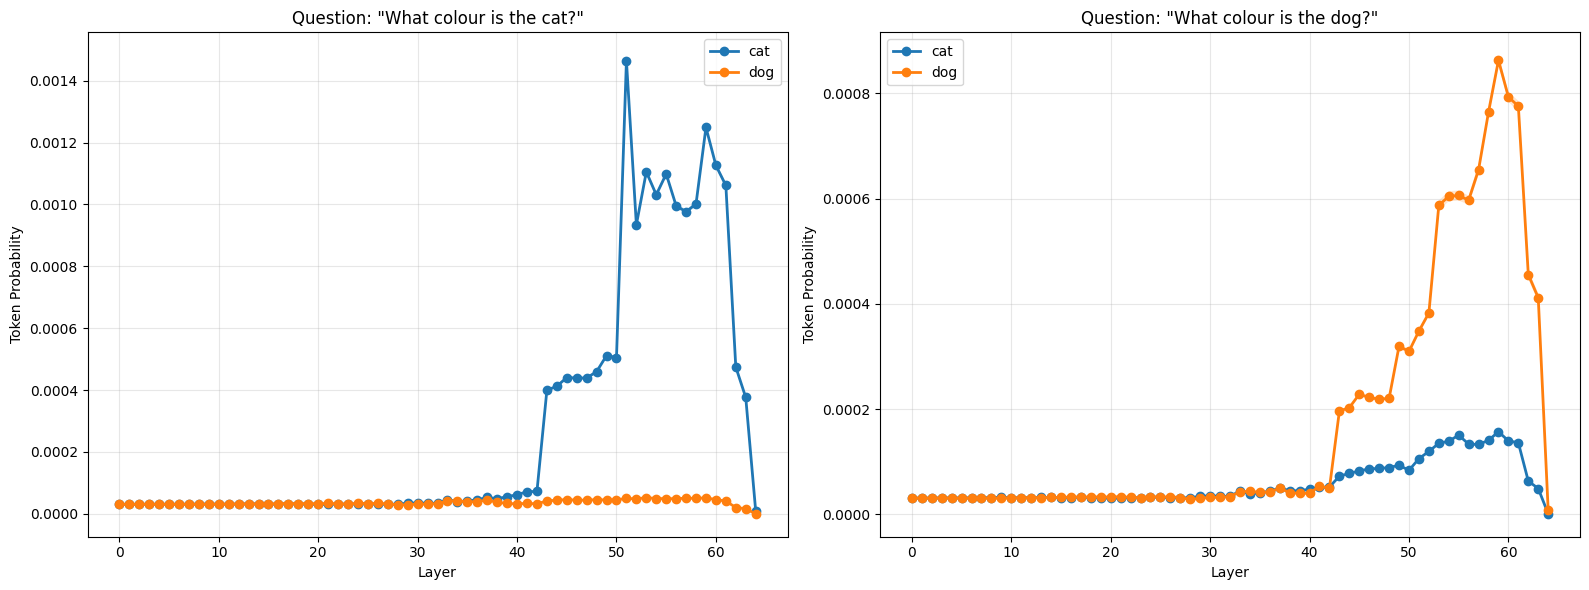

In [7]:
num_layers = data_cat.shape[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(num_layers)

for i, token in enumerate(target_tokens):
    y = mean_vals_cat[:, i]
    yerr = stderr_vals_cat[:, i]
    
    ax1.plot(x, y, label=token, marker='o', linewidth=2)
    ax1.fill_between(x, y - yerr, y + yerr, alpha=0.2)

ax1.set_xlabel('Layer')
ax1.set_ylabel('Token Probability')
ax1.set_title('Question: "What colour is the cat?"')
ax1.legend()
ax1.grid(True, alpha=0.3)

for i, token in enumerate(target_tokens):
    y = mean_vals_dog[:, i]
    yerr = stderr_vals_dog[:, i]
    
    ax2.plot(x, y, label=token, marker='o', linewidth=2)
    ax2.fill_between(x, y - yerr, y + yerr, alpha=0.2)

ax2.set_xlabel('Layer')
ax2.set_ylabel('Token Probability')
ax2.set_title('Question: "What colour is the dog?"')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(file_name, bbox_inches='tight')
plt.show()
plt.close()